In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.7.1+cu118'

## Get Data

In [74]:
weights = 0.7
bias = 0.3

X = torch.arange(0, 1, 0.02).unsqueeze(dim=1)
y = weights * X + bias

X.size(), X[:10], y[:10]

(torch.Size([50, 1]),
 tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [75]:
train_split = int(len(X) * 0.8)

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [76]:
def plot_predictions(train_data = X_train,
                     train_label = y_train,
                     test_data = X_test,
                     test_label = y_test,
                     predictions = None):
    
    """
    Plots the training, test and predictions
    """

    plt.scatter(train_data, train_label, c='r', s=4, label="Training data")

    plt.scatter(test_data, test_label, c='b', s=4, label="Testing data")

    if predictions is not None :

        plt.scatter(test_data, predictions, c='black', s=4, label="Predictions")

    plt.legend(prop={"size" : 14})

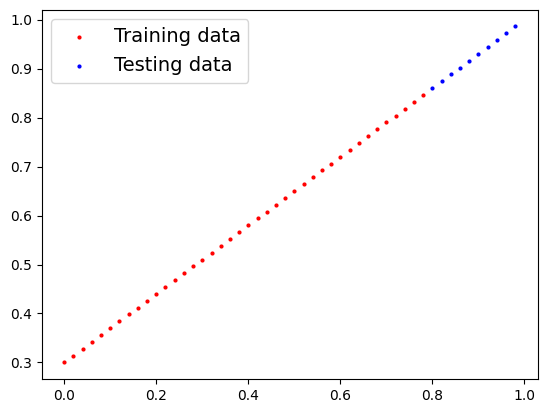

In [77]:
plot_predictions(train_data=X_train,
                 train_label=y_train,
                 test_data=X_test,
                 test_label=y_test)

## Build Model

In [ ]:
class LinearRegressionModel(nn.Module):

    def __init__(self):
        
        super().__init__()
        
        self.weights = nn.Parameter(torch.randn(1,
                                                dtype=torch.float,
                                                requires_grad=True))
        

        self.bias = nn.Parameter(torch.randn(1,
                                             dtype=torch.float,
                                             requires_grad=True))
        
        def forward(self, x: torch.tensor) -> torch.tensor:

            return self.weights * x + self.bias